In [ ]:
from sympy import diff
import numpy as np
import math
import sympy as sp
import matplotlib.pyplot as plt

384   7.990133779500752e-06   12.152014841375266   12.152006851241486


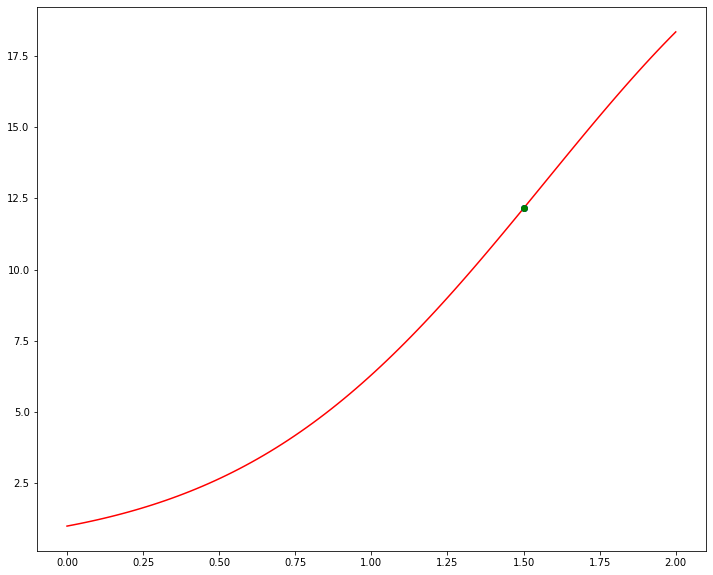

In [ ]:
# Вот и самая простая работа по Методам вычислений. А именно Линейный сплайн
def y(xi): # И снова задем собственную функцию
  yi = np.exp(xi + np.sin(xi))
  return yi
  
# Линейный Сплайн
def splain(x,y,t):
  h = x[1] - x[0] # Находим шаг h
  s = 0
  g = np.argmin(np.abs(x - t)) # Находим индес точки наиболее близкой к нашей точке интерполяции
  s += y[g] + (x[g] - t) * ((y[g-1] - y[g]) / h) # По формуле Сплайна находим значение в точке
  return s

A = 0 # Ничего новго. Задаем начало и конец диапазона по Х
B = 2
n = 3 # Начальное количество узлов. Всегда не менее 3, иначе не получится.
H = 100

plt.figure(1, figsize=(12, 10)) # Рисуем график нашей функции
X = np.linspace(A, B, H)
Y = [y(i) for i in X]
plt.plot(X, Y, 'r', label='My Func, 100 p.')

v = 1.5 # Точка интерполяции
ynew = []
xnew = []
p = 1
xnew = np.linspace(A, B, n) # Находим значения X для n узлов
ynew = [y(i) for i in xnew] # Находим значения Y для n узлов
# Запускаем цикл. Пока нынешнее значение Спалйна минус новое значение не окажется меньше eps
while abs(p - splain(xnew, ynew, v)) > 0.0001:
  p = splain(xnew, ynew, v) # Расчитываем Сплайн и запоминаем
  n *= 2 # Увеличиваем в 2 раза уоличество узлов
  xnew = np.linspace(A, B, n) # Рассчитываем новое значение X Для новых точек узлов
  ynew = [y(i) for i in xnew] # Рассчитываем новое значение Y Для новых точек узлов

print(len(xnew), " ", abs(y(v) - splain(xnew, ynew, v)), " ", y(v), " ", splain(xnew, ynew, v)) # делаем финальный вывод
plt.plot(v, splain(xnew, ynew, v), "bo")
plt.plot(v, y(v), "go")
